# 00.02 basics : error

## 01 quality when theres quantity

the rational number $\tfrac{1}{3}$ exists but it does not exist in the set known as FPS. instead, it is approximated by the nearest FPN. ie, hello errors.
</br></br>

if mathematical operations happen to this number, then hello more errors.

## 02 notation, floating-point operators

$\circ$, "round to nearest FPN". eg, $x,y \in\mathbb{R} \mapsto \circ (x+y) = \circ(x) + \circ(y)$.
</br></br>

also, $\oplus\,\ominus\,\otimes\,\oslash$ such that $x \oplus y = \circ(x+y)$. usw.

## 03 error

suppose $x \in\mathbb{R}$ and $\hat{x} \in\mathbb{FP}$ is its FPN approximation. ie, $\hat{x} = \circ x$. then
</br>

* <b>absolute error</b>, $\Delta x = |x-\hat{x}|$ and
* <b>relative error</b>, $\delta x = \tfrac{\Delta x}{|x|}$.

rounding is an algorithm and has two kinds of error:
</br>

1. <b>forward</b>, wrt how well the algorithm approximates the true output; and
2. <b>backward</b>, wrt how desired results relate back to expected input.

### i) forward error

suppose $x,y$ such that $\phi(x) = y$ and $\hat{\phi}(x) = \hat{y}$, where $\hat{\phi}$ is the numerical approximation to real problem $\phi$. then
</br>

* <b>forward error</b>, $\Delta y = y - \hat{y}$;
* <b>absolute forward error</b>, $|\Delta y| = |y - \hat{y}|$; and
* <b>relative forward error</b>, $\delta y = \tfrac{|\Delta y|}{|y|}$.

###### code, visual: forward error

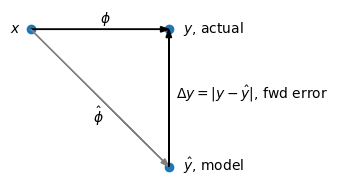

In [ ]:
if __name__ == "__main__":

  import matplotlib.pyplot as plt
  import numpy as np

  data = np.array([[0,1],[1,1],[1,0]]) # [x,y_act,y_mod] where y(x)
  ix = 0; iy_act = 1; iy_mod = 2
  jx = 0; jy = 1

  d_size = 2
  fig,ax = plt.subplots(figsize=(d_size,d_size))

  ax.scatter(data[:,jx],data[:,jy],c="C00")
  d_offset = d_size/20.
  for point,label,offset in zip(data,["$x$","$y$, actual","$\hat{y}$, model"],\
     [-d_offset*1.5,d_offset,d_offset]):

    ax.annotate(label,(point[0],point[1]),(point[0]+offset,point[1]-d_offset*0.25))

  d_head = d_size/50.
  for ifrom,ithru,label,color,offset in zip([ix,ix,iy_mod],[iy_act,iy_mod,iy_act],\
      ["$\phi$","$\hat{\phi}$","$\Delta y = |y-\hat{y}|$, fwd error "],\
      ["0","0.5","0"],[(0,1),(-1,-3.5),(1,0)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    ax.arrow(data[ifrom,jx],data[ifrom,jy],dx,dy,color=color,\
      head_width=d_head,length_includes_head=True)
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    ax.annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  plt.axis("off")
  plt.show()


### ii) backward error

suppose $x, \Delta x$ such that $\hat{\phi}(x) = \hat{y} = \phi(x+\Delta x)$. then
</br>

* <b>backward error</b>, $\Delta x = \Delta x_{\text{min}}$ where $\hat{\phi}(x) = \hat{y} = \phi(x+\Delta x)$;
* <b>absolute backward error</b>, $|\Delta x|$; and
* <b>relative backward error</b>, $\delta x = \tfrac{|\Delta x|}{|x|}$.
</br>

ie, backward error identifies the ("nearby") problem the algorithm actually solved.

###### code, visual: backward error

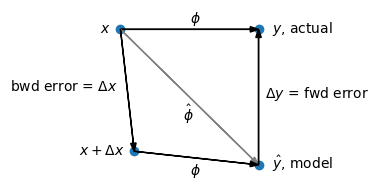

In [ ]:
if __name__ == "__main__":

  import matplotlib.pyplot as plt
  import numpy as np

  data = np.array([[0,1],[1,1],[1,0],[0.1,0.1]]) # [x,y_act,y_mod,x+Δx] where y(x)
  ix = 0; iy_act = 1; iy_mod = 2; ix_del = 3
  jx = 0; jy = 1

  d_size = 2
  fig,ax = plt.subplots(figsize=(d_size,d_size))

  ax.scatter(data[:,jx],data[:,jy],c="C00")
  d_offset = d_size/20.
  for point,label,offset in zip(data,["$x$","$y$, actual","$\hat{y}$, model","$x+\Delta x$"],\
     [-d_offset*1.5,d_offset,d_offset,-d_offset*4]):

    ax.annotate(label,(point[0],point[1]),(point[0]+offset,point[1]-d_offset*0.25))

  d_head = d_size/50.
  for ifrom,ithru,label,color,offset in zip([ix,ix,iy_mod,ix,ix_del],\
      [iy_act,iy_mod,iy_act,ix_del,iy_mod],\
      ["$\phi$","$\hat{\phi}$","$\Delta y$ = fwd error","bwd error = $\Delta x$","$\phi$"],\
      ["0","0.5","0","0","0"],[(0,1),(-1,-3.5),(1,0),(-17,0),(-1,-2.5)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    ax.arrow(data[ifrom,jx],data[ifrom,jy],dx,dy,color=color,\
      head_width=d_head,length_includes_head=True)
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    ax.annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  plt.axis("off")
  plt.show()


#### why perturb $x$ there?

why is $\Delta x$ applied to $\phi(x)$ and not $\hat{\phi}(x)$? bc perturbing the latter changes the computed approximation itself rather than identifying a nearby problem for which the original approximation is the exact solution.
</br></br>

<b>backward error analysis</b> is based on the idea that numerical methods introduce errors and the goal is to understand how these errors relate to the original problem. determining the smallest perturbation $\Delta x$ that makes $\hat{\phi}(x)$ the exact solution to $\phi(x + \Delta x)$, allows quantification of the computation to see how far it has strayed from the original problem and to determine if it is still meaningful.

## 04 terminology

fyi, this course favors (albeit imperfectly) "actual problem" and "model solution".

###### code, visual: words words words

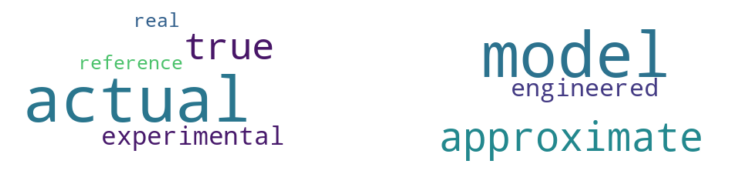

In [ ]:
if __name__ == "__main__":

  import matplotlib.pyplot as plt
  from wordcloud import WordCloud

  ws_lhs = ["actual","experimental","real","reference","true"]
  ns_lhs = [30,2,1,1,6]
  ws_rhs = ["approximate","engineered","model"]
  ns_rhs = [8,2,30]
  wx = [ws_lhs,ws_rhs]
  nx = [ns_lhs,ns_rhs]

  fig,axs = plt.subplots(1,2,figsize=(10,2))

  i = 0
  for ns,ws in zip(nx,wx):
    text = ""
    for imax,word in zip(ns,ws):
      for _ in range(imax):
        text += " " + word

    words = WordCloud(background_color="white",stopwords=[""]).generate(text)
    axs[i].imshow(words,interpolation="bilinear")
    axs[i].axis("off")
    i += 1

  plt.show()


## 05 stability

### i) forward stability

an engineered solution is <b>forward stable</b> if there exists $\eta > 0$ such that $||y-\hat{y}|| \le \eta \times ||y||$.

---
however, forward error analysis is not prevalent bc "true" $\phi$ is not always readily available. eg, $\sqrt{3} \in\mathbb{R}$ but $\sqrt{3} \notin\mathbb{FP}$.
</br></br>

ie, to implement an algorithm computationally, is to part ways with forward stability analysis at its abstract level. however, computationally, <b>use pythons native and/or standard libary functions to stand in for "true" $\phi$</b>.
</br></br>

note: $\sqrt{3} \in\mathbb{CAS}$, where $\mathbb{CAS}$ refers to "computer algebra systems" but that is not the same as a set of numbers.

</br>

### ii) backward stability

an engineered solution is <b>backward stable</b> if there exists $\epsilon > 0$ such that $||\Delta x|| \le \epsilon \times ||x||$ where $\hat{\phi}(x) = \hat{y} = \phi(x+\Delta x)$.

### iii) numerical stability

an algorithm is of mixed stability iif there exists a $\Delta x$ such that both $\Delta x$ is small and $\phi(x+\Delta x) - \hat{y}$ is small. ie,
</br></br>

an engineered solution is <b>numerically stable</b> iif there exists $\eta > 0, \epsilon > 0$ such that $\tfrac{||y - \hat{y}||}{ ||y||} \le \eta$ and $\tfrac{||\Delta x||}{||x||} \le \epsilon$, where $y = \phi(x+\Delta x)$ and $\hat{y} = \hat{\phi}(x)$.

###### code, visual: numerical stability à la wiki

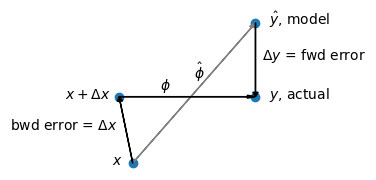

In [ ]:
if __name__ == "__main__":

  import matplotlib.pyplot as plt
  import numpy as np

  data = np.array([[0.1,0.1],[1,1],[1,2],[0,1]]) # [x,y_act,y_mod,x+Δx] where y(x)
  ix = 0; iy_act = 1; iy_mod = 2; ix_del = 3
  jx = 0; jy = 1

  d_size = 2
  fig,ax = plt.subplots(figsize=(d_size,d_size))

  ax.scatter(data[:,jx],data[:,jy],c="C00")
  d_offset = d_size/20.
  for point,label,offset in zip(data,["$x$","$y$, actual","$\hat{y}$, model","$x+\Delta x$"],\
     [-d_offset*1.5,d_offset,d_offset,-d_offset*4]):

    ax.annotate(label,(point[0],point[1]),(point[0]+offset,point[1]-d_offset*0.25))

  d_head = d_size/50.
  for ifrom,ithru,label,color,offset in zip([ix,iy_mod,ix,ix_del],\
      [iy_mod,iy_act,ix_del,iy_act],\
      ["$\hat{\phi}$","$\Delta y$ = fwd error","bwd error = $\Delta x$","$\phi$"],\
      ["0.5","0","0","0"],[(0,4),(1,0),(-17,0),(-4,2)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    ax.arrow(data[ifrom,jx],data[ifrom,jy],dx,dy,color=color,\
      head_width=d_head,length_includes_head=True)
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    ax.annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  plt.axis("off")
  plt.show()


###### code, visual: numerical stability à la higham, corliss

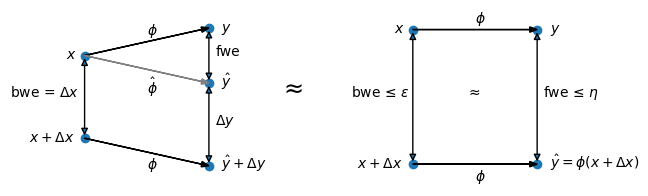

In [ ]:
if __name__ == "__main__":

  import matplotlib.pyplot as plt
  import numpy as np

  data = np.array([[0,0.8],[0,0.2],[1,1],[1,0.6],[1,0]]) # [x,x+Δx,y_act,y_mod,y_mod+Δy] where y(x)
  ix = 0; ix_del = 1; iy_act = 2; iy_mod = 3; iy_del = 4
  jx = 0; jy = 1

  d_size = 2
  n_subplots = 3
  fig,axs = plt.subplots(1,n_subplots,figsize=(d_size*n_subplots,d_size))

  # plot 0,label: data
  axs[0].scatter(data[:,jx],data[:,jy],c="C00")
  d_offset = d_size/20.
  for point,label,offset in zip(data,["$x$","$x+\Delta x$","$y$","$\hat{y}$","$\hat{y}+\Delta y$"],\
     [-d_offset*1.5,-d_offset*4.5,d_offset,d_offset,d_offset]):

    axs[0].annotate(label,(point[0],point[1]),(point[0]+offset,point[1]-d_offset*0.25))

  d_head = d_size/50.
  # plot 0,label: ϕ
  for ifrom,ithru,label,color,offset in zip([ix,ix,ix_del],\
      [iy_act,iy_mod,iy_del],\
      ["$\phi$","$\hat{\phi}$","$\phi$"],\
      ["0","0.5","0"],[(0,1),(0,-3.5),(0,-2.5)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    axs[0].arrow(data[ifrom,jx],data[ifrom,jy],dx,dy,color=color,\
      head_width=d_head,length_includes_head=True)
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    axs[0].annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  # plot 0,label: Δx, Δy
  for ifrom,ithru,label,color,offset in zip([ix,iy_act,iy_mod],\
      [ix_del,iy_mod,iy_del],\
      ["bwe = $\Delta x$","fwe","$\Delta y$"],\
      ["0","0","0"],[(-12,0),(1,0),(1,0)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    axs[0].annotate("",xy=(data[ifrom,jx],data[ifrom,jy]),xytext=(data[ifrom,jx]+dx,data[ifrom,jy]+dy),\
      arrowprops=dict(arrowstyle="<|-|>"))
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    axs[0].annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  # plot 1, spacer
  axs[1].text(0.3,0.5,"≈",fontsize="xx-large")

  # plot 2, data
  data = np.array([[0,1],[0,0],[1,1],[1,0]]) # [x,x+Δx,y_act,y_mod] where y(x)
  ix = 0; ix_del = 1; iy_act = 2; iy_mod = 3

  # plot 2,label: data
  axs[2].annotate("≈",(0.45,0.5))
  axs[2].scatter(data[:,jx],data[:,jy],c="C00")
  d_offset = d_size/20.
  for point,label,offset in zip(data,["$x$","$x+\Delta x$","$y$","$\hat{y}=\phi(x+\Delta x)$"],\
     [-d_offset*1.5,-d_offset*4.5,d_offset,d_offset,d_offset]):

    axs[2].annotate(label,(point[0],point[1]),(point[0]+offset,point[1]-d_offset*0.25))

  # plot 2,label: ϕ
  for ifrom,ithru,label,color,offset in zip([ix,ix_del],\
      [iy_act,iy_mod],\
      ["$\phi$","$\phi$"],\
      ["0","0"],[(0,1),(0,-2.5)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    axs[2].arrow(data[ifrom,jx],data[ifrom,jy],dx,dy,color=color,\
      head_width=d_head,length_includes_head=True)
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    axs[2].annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  # plot 0,label: Δx, Δy
  for ifrom,ithru,label,color,offset in zip([ix,iy_act],\
      [ix_del,iy_mod],\
      ["bwe ≤ $\epsilon$","fwe ≤ $\eta$"],\
      ["0","0"],[(-10,0),(1,0)]):

    dx = data[ithru,jx] - data[ifrom,jx]; dy = data[ithru,jy] - data[ifrom,jy]
    axs[2].annotate("",xy=(data[ifrom,jx],data[ifrom,jy]),xytext=(data[ifrom,jx]+dx,data[ifrom,jy]+dy),\
      arrowprops=dict(arrowstyle="<|-|>"))
    dx += d_offset*offset[0]
    dy += d_offset*offset[1]
    axs[2].annotate(label,(data[ifrom,jx],data[ifrom,jy]),(data[ifrom,jx]+dx/2,data[ifrom,jy]+dy/2))

  axs[0].axis("off")
  axs[1].axis("off") # lol = spacer, atm
  axs[2].axis("off")
  plt.show()


## 06 propagation

### i) error magnification

<b>error magnification</b>, frequently $\gamma$, relates forward and backward error wrt amplification. ie, it quantifies how small errors in input can increase in the final solution.
</br></br>

\begin{align}
  \gamma &= \text{forward error} / \text{backward error} = |\Delta y| / |\Delta x| \\
  \\
  &\Downarrow \quad\text{or more formally} \\
  \\
  &= \lim_{\Delta x\rightarrow 0}\, \text{sup}_{\Delta x \le \epsilon}\, |\Delta y|/|\Delta x|.
\end{align}

### ii) condition number

<b>condition number</b>, frequently $\kappa$, relates forward and backward error wrt likelihood. ie, it quantifies how small perturbations in input affect the final solution.
</br></br>

\begin{align}
  \kappa &= \text{relative forward error} / \text{relative backward error} = |\delta y| / |\delta x| \\
  \\
  &\Downarrow \quad\text{or more formally} \\
  \\
  &= \lim_{\Delta x\rightarrow 0}\, \text{sup}_{\Delta x \le \epsilon}\, [\,|\Delta y| / |y|\,] / [\,|\Delta x| / |x|\,].
\end{align}
</br>

a small condition number indicates a "well-conditioned" system and a large condition number indicates an "ill-conditioned" system wrt stability.

</br></br></br></br></br></br></br></br></br></br>

##### example 01

consider perturbations wrt $p(x) = 17x^3 + 11x^2 + 2 \Rightarrow \Delta y$.

\begin{align}
  \Delta y &= p(x + \Delta x) - p(x) \\
  &= [17(x+\Delta x)^3 + 11(x+\Delta x)^2 + 2] - [17x^3 + 11x^2 + 2] \\
  &= 51x^2\Delta x + 51x(\Delta x)^2 + 17(\Delta x)^3 + 22x(\Delta x) + 11(\Delta x)^2 \\
  \\
  &\Downarrow \quad|\Delta x| \ll 1 \text{, disregard higher orders of } \Delta x \\
  \\
  \Delta y &\approx 51x^2\Delta x + 22x\Delta x. \\
  \\
  &\Downarrow \quad\text{consider } x = 1 \pm 0.1 \\
  \\
  \Delta y &\approx 30 \pm 7.3.
\end{align}

$p(1) = 30$, so the $\pm 7.1$ that results from $\Delta x = \pm 0.1$ is inherent to this $p(x)$.
</br></br>

consider $1$ as an ideal upper bound for $\kappa$.
</br></br>

\begin{align}
  \kappa_{\text{REL}} &= |\delta y| / |\delta x| = |7.3/30| / |0.1/1| = 2.4\overline{3} \sim\,\text{not great!} \\
  \\
  \kappa_{\text{ABS}} &= |\delta y| / |\delta x| = |7.3|/|0.1| = 73 \sim\,\text{godawful.}
\end{align}

</br></br></br></br></br></br></br></br></br></br>
</br></br></br></br></br></br>

##### theorem 01. rounding error limit

suppose $i = 1,\dots,n$ and $0 < \delta_i \le \mu_{\text{mach}}$ and $\epsilon_i \in\{-1,+1\}$. additionally, suppose $n\mu_{\text{mach}} < 1$. then
</br></br>

$$\prod^n\, (1+\delta_i)^{e_i} = 1 + \Theta_n$$
</br>

where $|\Theta_n| \le \gamma_n \equiv n\mu_{\text{mach}}/(1-n\mu_{\text{mach}})$. ie, <b>$\Theta_n$ aggregates error and $\gamma_n$ is its bound.</b>$^{[1]}$
</br></br>

note: rounding error, $\mu_{\text{mach}} = \tfrac{1}{2}\epsilon_{\text{mach}}$, where $\epsilon_{\text{mach}}$ is machine error.

###### proof-lite

\begin{align}
  \prod^n\, (1+\delta_i)^{e_i} &\le \prod^n\, (1+\delta_i) \le \prod^n\, (1+\mu_{\text{mach}}) = (1+\mu_{\text{mach}})^n. \\
  \\
  &\le (1+n\mu_{\text{mach}})^n \\
  \\
  &\le \frac{1}{1 - n\mu_{\text{mach}}} \quad\text{bc binomial theorem, } n\mu_{\text{mach}} < 1 \\
  \\
  &\Rightarrow \text{choose } \gamma_n = \frac{1}{1 - n\mu_{\text{mach}}} - 1 = \frac{n\mu_{\text{mach}}}{1 - n\mu_{\text{mach}}} \\
  \\
  &\Rightarrow \Theta_n + 1 \le \gamma_n  + 1. \enspace\checkmark
\end{align}

</br></br></br></br></br></br></br></br></br></br>
</br></br></br></br></br>

##### theorem 02. dot product in $\mathbb{R}^3$

dot product in $\mathbb{R}^3$ is backward stable in $\mathbb{FP}^3$.

###### proof

determine backward stability for the computational approximation of the dot product.

<i>note: for simplicity, this proof only considers $\otimes$, which is more expensive then $\oplus$.</i>

\begin{align}
  \phi(x,y) &= x\cdot y \quad x,y \in\mathbb{R}^3 \quad\text{and} \\
  \hat{\phi}(\hat{x},\hat{y}) & = \hat{x}\odot\hat{y} = (\hat{x_1}\otimes\hat{y_1})+(\hat{x_2}\otimes\hat{y_2})+(\hat{x_3}\otimes\hat{y_3}) \\
  \\
  &\Downarrow \quad\text{where } \hat{x}_j = x_j(1+\color{blue}{\delta_{x_j}}), \hat{y}_j = y_j(1+\color{blue}{\delta_{y_j}}), \quad \color{blue}{\text{representation error}} \\
  \\
  &= \sum^3_{j=1}\, x_j(1+\color{blue}{\delta_{x_j}}) \color{orange}{\otimes} y_j(1+\color{blue}{\delta_{y_j}}) \\
  &= \sum^3_{j=1}\, x_j(1+\color{blue}{\delta_{x_j}}) y_j(1+\color{blue}{\delta_{y_j}}) (1 + \color{orange}{\delta_{\otimes_j}}), \quad \color{orange}{\otimes \text{ operation error}} \\
  &= \sum^3_{j=1}\, x_jy_j(1+\color{blue}{\delta_{x_j}}) (1+\color{blue}{\delta_{y_j}}) (1 + \color{orange}{\delta_{\otimes_j}}) \\
  &= \sum^3_{j=1}\, x_jy_j(1+\color{green}{\Theta_{3,j}}) \quad\text{order } \color{green}{3} \text{ per } j, \text{ theorem 01} \\
  &= x_1y_1(1+\color{green}{\Theta_{3,1}}) + x_2y_2(1+\color{green}{\Theta_{3,2}}) + x_3y_3(1+\color{green}{\Theta_{3,3}}) \\
  \\
  &\Downarrow \quad\text{let } \color{red}{\Delta x_j} = x_j\color{green}{\Theta_{3,j}} \\
  \\
  &= \phi(x,y) + \underbrace{y_1\color{red}{\Delta x_1} + y_2\color{red}{\Delta x_2} + y_3\color{red}{\Delta x_3}}_{\text{dot product bt }y,\color{red}{\Delta x}} = \phi(x,y) + \phi(\color{red}{\Delta x},y) \quad \\
  \\
  &\Downarrow \quad\text{let } \color{purple}{\Delta y} = 0 \\
  \\
  &= \phi(x+\color{red}{\Delta x},y+\color{purple}{\Delta y}) \\
  \\
  &\Rightarrow \text{choose } \gamma_{\color{green}{3}} \text{ such that } ||(\color{red}{\Delta x},\color{purple}{\Delta y})|| \le \gamma_{\color{green}{3}} ||(x,y)|| \text{ and } |\color{green}{\Theta_{3,j}}| \le \gamma_{\color{green}{3}} = \tfrac{\color{green}{3}\mu_{\text{mach}}}{1 - \color{green}{3}\mu_{\text{mach}}}, \text{ theorem 01} \\
  \\
  &\Rightarrow\, \therefore \text{ bounded and backward stable. } \blacksquare
\end{align}

#### condition number vs correlation

however, distinguish between stability and correlation. eg, $\kappa \ll 1$ indicates high stability wrt to a system between its modeled inputs to output but the inputs may not correlate (ie, relate linearly) to the output.

#### matrix condition number

<b>matrix condition number</b>, $cond(A)$, is a specific type of condition number that relates to matrices. for matrix $A = \{a_{ii}\}$,
</br></br>

$$cond(A) = \kappa(A) \ge \frac{\text{max}_i(|a_{ii}|)}{\text{min}_i(|a_{ii}|)}.$$

### iii) error magnification vs condition number

error magnification indicates how much an error is amplified; condition number indicates how likely it is for an error to be amplified.

</br></br></br></br></br></br></br></br></br></br>
</br></br></br></br></br></br></br></br></br></br>
</br>

## resources

* perturbation theory [@wiki](https://en.wikipedia.org/wiki/Perturbation_theory)
* stability analysis [@wiki](https://en.wikipedia.org/wiki/Stability_theory) (this one is way too much tbh, so for fun, yes?)
* condition number [@wiki](https://en.wikipedia.org/wiki/Condition_number)
</br></br>

additional reading for theorem 01.
* mcclure, david. "ch 09, computer rounding errors", <i>computational physics guide</i>, editura, 2009.$^{[3]}$
* mcclure, david. "ch 10, computer rounding errors: applications", <i>computational physics guide</i>, editura, 2009.$^{[4]}$
</br>

additional reading for stability. or for anything, really.
* higham, nick. <i>[backward error](https://nhigham.com/2020/03/25/what-is-backward-error/)</i>. $\color{orange}{\bigstar}$
* higham, nick. <i>[numerical stability](https://nhigham.com/2020/08/04/what-is-numerical-stability/)</i>. $\color{orange}{\bigstar}$

## references

1. corliss, richard. <i></i>
2. <i>ibid.</i>
3. may be searched at source: portland state university.
4. may be searched at source: portland state university.